In [1]:
import numpy as np
import matplotlib.pyplot as plt
from suitability.filter.tests import non_inferiority_ttest

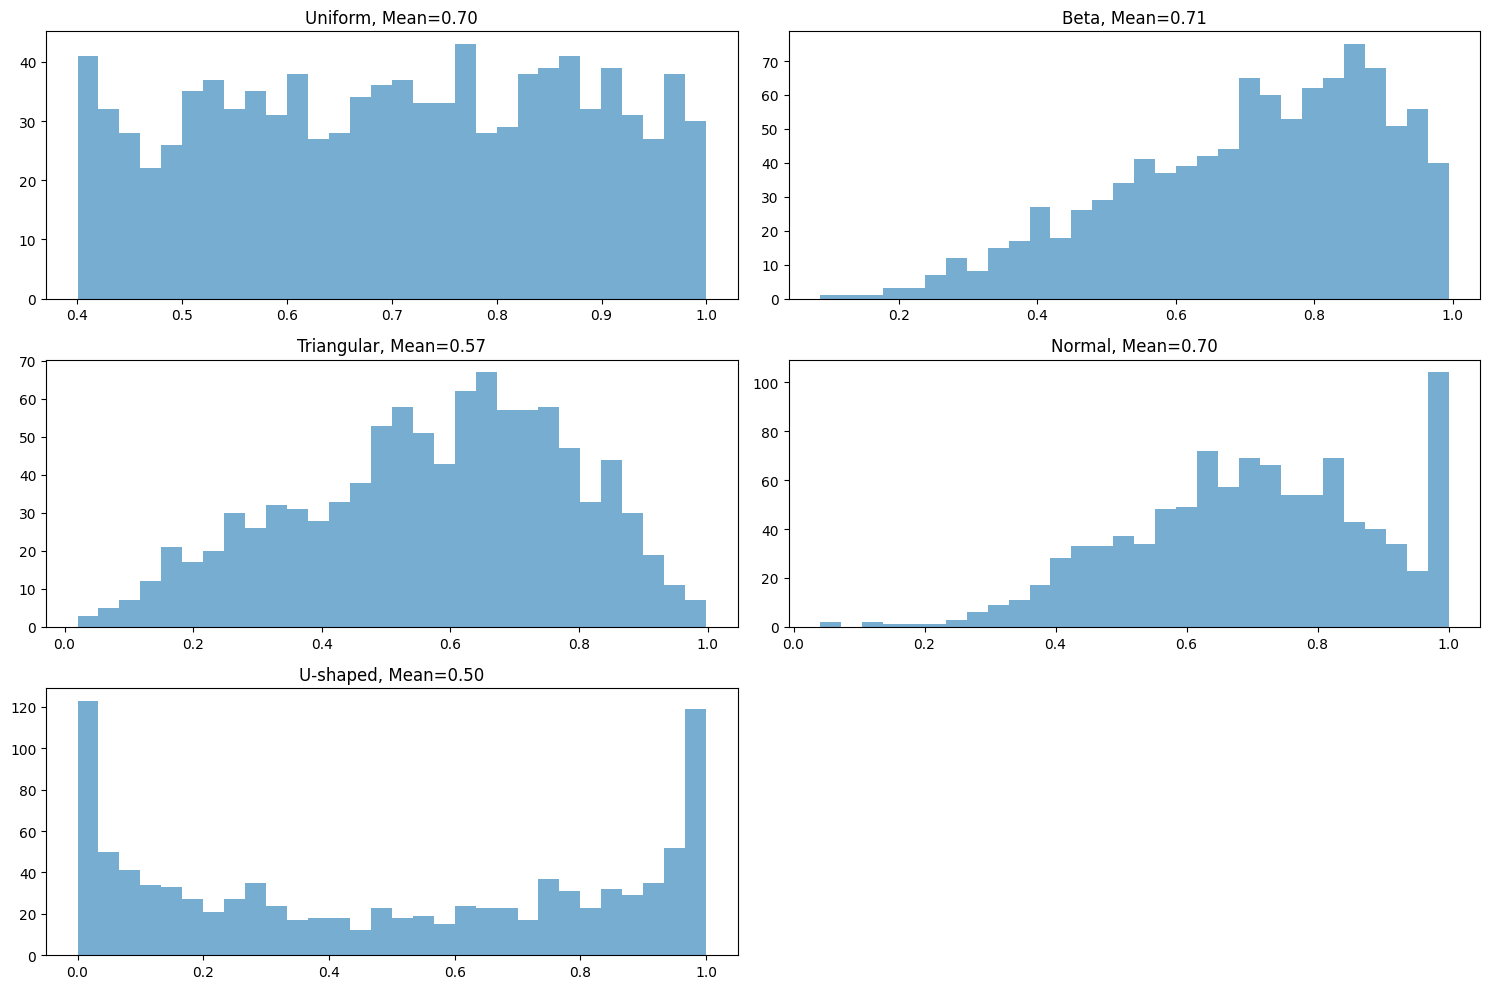

In [2]:
def generate_distribution(distribution_type, num_samples=1000, target_mean=0.5):
    if distribution_type == "uniform":
        # Uniform Distribution adjusted for mean
        uniform_min = max(0, 2 * target_mean - 1)
        uniform_max = min(1, 2 * target_mean)
        samples = np.random.uniform(uniform_min, uniform_max, num_samples)
        
    elif distribution_type == "beta":
        # Beta Distribution adjusted for mean (mean=μ=a/(a+b))
        if 0 < target_mean < 1:
            a = target_mean * 5  # Adjust this scaling factor as needed
            b = (1 - target_mean) * 5
            samples = np.random.beta(a, b, num_samples)
        else:
            samples = np.random.uniform(0, 1, num_samples)  # Fall back to uniform if mean=0 or 1

    elif distribution_type == "triangular":
        # Triangular Distribution adjusted for mean
        samples = np.random.triangular(0, target_mean, 1, num_samples)

    elif distribution_type == "normal":
        # Clipped Normal Distribution adjusted for mean
        samples = np.clip(np.random.normal(loc=target_mean, scale=0.2, size=num_samples), 0, 1)

    elif distribution_type == "u-shaped":
        # U-shaped Beta Distribution (concentrated around 0 and 1)
        samples = np.random.beta(0.5, 0.5, num_samples)

    else:
        raise ValueError("Invalid distribution type specified. Choose from 'uniform', 'beta', 'triangular', 'normal', or 'u-shaped'.")
    
    return samples

def generate_distributions(num_samples=1000, target_mean=0.5):
    distribution_types = ["uniform", "beta", "triangular", "normal", "u-shaped"]
    distributions = {dist_type: generate_distribution(dist_type, num_samples, target_mean) for dist_type in distribution_types}
    return distributions

# Plotting function
def plot_distributions(distributions):
    plt.figure(figsize=(15, 10))
    
    for i, (dist_type, data) in enumerate(distributions.items(), start=1):
        plt.subplot(3, 2, i)
        plt.hist(data, bins=30, alpha=0.6)
        plt.title(f"{dist_type.capitalize()}, Mean={data.mean():.2f}")

    plt.tight_layout()
    plt.show()

# Example usage
target_mean = 0.7
num_samples = 1000

distributions = generate_distributions(num_samples, target_mean)
plot_distributions(distributions)


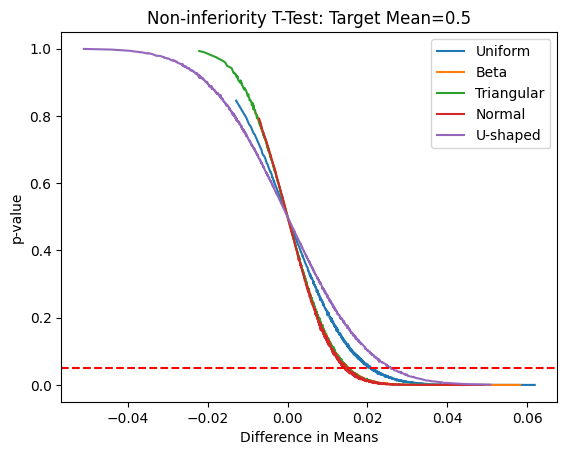

In [10]:
dist_types = ["uniform", "beta", "triangular", "normal", "u-shaped"]
num_samples = 1000
target_mean = 0.5
delta = 0.02

for dist_type in dist_types:
    x = []
    y = []

    for i in range(1000):
        dist1 = generate_distribution(dist_type, num_samples, target_mean)
        dist2 = generate_distribution(dist_type, num_samples, target_mean+delta)
        x.append(np.mean(dist2)-np.mean(dist1))
        y.append(non_inferiority_ttest(dist1, dist2)["p_value"])

    sorted_indices = np.argsort(x)
    x = np.array(x)[sorted_indices]
    y = np.array(y)[sorted_indices]
    plt.plot(x, y, label=dist_type.capitalize())


plt.xlabel("Difference in Means")
plt.ylabel("p-value")
plt.title(f"Non-inferiority T-Test: Target Mean={target_mean}")
plt.axhline(0.05, color='r', linestyle='--')
plt.legend()
plt.show()